---
**Autores**: Prof. João Nogueira e Prof. Dino Magri

**Licença deste notebook**:
<br>
<img align="left" width="80" src="https://licensebuttons.net/l/by/3.0/88x31.png" />

<br>
<br>

[Clique aqui para saber mais sobre a licença CC BY v4.0](https://creativecommons.org/licenses/by/4.0/legalcode.pt)


---

## Projeto - Parte 2 - Aprendizagem Supervisionada - Classificação - Exercícios

---
#### NOME COMPLETO: `MARCIO FERNANDES CRUZ`
---




## Definição do Problema

O departamento de CRM/Marketing do iFood fez uma solicitação para o time de Ciência de Dados (que estão atrelados ao time de dados dentro da área de TI) para criar um modelo de Machine Learning para prever os clientes que darão Churn.


O objetivo deles com o modelo é atuar sobre os clientes com maiores chances de darem churn no próximo mês.

- A ação será realizada 1 vez por mês, todo dia 01.
- Como a frequência de compras dos clientes do IFood é relativamente alta, então ficou-se decidido na reunião com a área cliente que o modelo seria construído usando features construídas em um período fechado de 1 mês para prever se um dado cliente irá deixar de comprar (churn) no próximo mês.

A métrica principal de avaliação do modelo é a AUC, dado que o score gerado pelo modelo será usado para ordenar a base.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd

## Lendos os Dados

In [ ]:
import pandas as pd
import os

WORK_DIR = '/content/drive/MyDrive/Colab Notebooks/DataSet Data Science'
DATA_DIR = os.path.join(WORK_DIR, 'ifood')
df_orders = pd.read_csv(os.path.join(DATA_DIR, 'df_orders.csv'))

In [ ]:
df_orders.head(4)

,order_id,order_number,order_timestamp_local,order_shift,last_status_date_local,order_total,credit,paid_amount,delivery_type,scheduled,...,distance_merchant_customer,promo_is_promotion,normal_items_quantity,promo_items_quantity,order_lag_at_login,order_lead_at_login,order_date_local,valid_order,session_id,customer_id
0,630e2af0-b456-4b3a-b964-4d66ce5cc5df,1290139943,2019-12-11T13:22:06.497Z,weekday lunch,2019-12-11T15:22:39.156Z,28.90,14.0,24.9,DELIVERY,False,...,2722.603906,0.0,2.0,0.0,2.0,1.0,2019-12-11T00:00:00.000Z,1,ccbcf9e2-3728-4458-a813-4031ae22e4bd,48b6d81407646ca61163f064a426ce38ac08bed2ce84f0...
1,66f8163d-f081-4fbd-adb8-cfbbff9213f7,1141271215,2019-11-06T17:57:17.967Z,weekday dinner,2019-11-06T18:18:48.680Z,56.35,7.9,50.4,DELIVERY,False,...,1108.823183,1.0,0.0,1.0,7.0,1.0,2019-11-06T00:00:00.000Z,1,d9e94d88-ca88-4997-ad4c-62b9c0a35c1b,b3f74186880f5f9a79e0865ad8beab47e22b785b8b3bc0...
2,e8c55557-81d4-4159-bd2b-c144e5fbabe3,694742752,2019-06-11T20:42:32.058Z,weekday dinner,2019-06-11T22:42:54.005Z,53.80,4.0,49.8,DELIVERY,False,...,1642.258522,0.0,2.0,0.0,5.0,1.0,2019-06-11T00:00:00.000Z,1,035b33cd-6ddf-4ee2-a887-7ba490bb9700,c4f8999d4cb83cac8134b2051ffc611d5d660c049c3744...
3,34a60e0d-0042-49af-9aa8-4dc526a998c2,679245732,2019-06-05T19:16:42.111Z,weekday dinner,2019-06-05T21:17:13.264Z,58.90,4.0,54.9,DELIVERY,False,...,441.677507,0.0,1.0,0.0,9.0,2.0,2019-06-05T00:00:00.000Z,1,93f66506-a8ba-4c22-97ea-7489131958bb,ac89a3eb35853705a09d54f1e5988ad876628b986045cd...


## Análise Exploratória (1 ponto)

**<span style="color:blue">(0.25 ponto)</span> `Q1`** Quantas linhas e colunas existem na base `df_orders`?

In [ ]:
total_linha = df_orders.shape[0]
total_colunas = df_orders.shape[1]

print(f'Resposta: O total de linhas é {total_linha} e o de olunas é {total_colunas}')

Resposta: O total de linhas é 492138 e o de olunas é 43


**<span style="color:blue">(0.25 ponto)</span> `Q2`** Verifique se todos os pedidos são unicos.

In [ ]:
if len(df_orders['order_id'].unique())==df_orders.shape[0]:
  print('Resposta: Os pedidos são unicos')
else:
  print('Resposta: Os pedidos não são unicos')


Resposta: Os pedidos são unicos


**<span style="color:blue">(0.25 ponto)</span> `Q3`** Qual o pedido mais antigo e o mais recente da base? Utilize a variável `order_timestamp_local`.

In [ ]:
df_orders['order_timestamp_local'] = pd.to_datetime(df_orders['order_timestamp_local'])
df_velho = (
    df_orders.groupby('order_number')
    .agg(velho = ('order_timestamp_local','min')).nsmallest(1, 'velho'))
df_velho.reset_index(inplace=True)
data_pedido_mais_antigo = df_velho.loc[0]["velho"]
numero_pedido_mais_antigo = df_velho.loc[0]["order_number"]

df_novo = (
    df_orders.groupby('order_number')
    .agg(novo = ('order_timestamp_local','max')).nlargest(1, 'novo'))
df_novo.reset_index(inplace=True)
data_pedido_mais_novo = df_novo.loc[0]["novo"]
numero_pedido_mais_novo = df_novo.loc[0]["order_number"]

print(f"Resposta: O pedido mais antigo é {numero_pedido_mais_antigo} com data de {data_pedido_mais_antigo}")
print(f"Resposta: O pedido mais novo é {numero_pedido_mais_novo} com data de {data_pedido_mais_novo}")


Resposta: O pedido mais antigo é 667742584 com data de 2019-06-01 00:00:15.369000+00:00
Resposta: O pedido mais novo é 1373960993 com data de 2019-12-31 23:31:59.972000+00:00


**<span style="color:blue">(0.25 ponto)</span> `Q4`** Quantos usuários únicos existem na base?

In [ ]:
print('Resposta: O número de usuários únicos na base é ', len(df_orders['customer_id'].unique()))


Resposta: O número de usuários únicos na base é  30079


## Criação da ABT (10 pontos)

Será que variáveis como Recência, Frequência e Valor podem nos ajudar a prever se um dado cliente irá realizar um novo pedido no próximo mês?

Vamos criar variáveis que descrevem o comportamento do cliente com base em 1 mês e usar essas variáveis para prever se o cliente irá comprar no próximo mês (caso em que acontecerá um churn e talvez seja interessante oferecermos um cupom de desconto através de notificações no app).

**<span style="color:blue">(1.0 ponto)</span> `Q5`** Crie um DataFrame chamado `df_features_train` que deverá conter os dados do período 2019-06-01 (inclusivo) até 2019-07-01 (exclusivo), ou seja deve conter somente os dados referente ao mês 6.

In [ ]:
filtro = (df_orders["order_timestamp_local"]>="2019-06-01") & (df_orders["order_timestamp_local"]<"2019-07-01")
df_features_train  = df_orders[filtro]

print(f'Análise: Em Junho/2019 há {df_features_train.shape[0]} observações.')


Análise: Em Junho/2019 há 88451 observações.


**<span style="color:blue">(1.0 ponto)</span> `Q6`** Crie um DataFrame chamado `df_target_train` que deverá conter os dados do período 2019-07-01 (inclusivo) até 2019-08-01 (exclusivo), ou seja deve conter somente os dados referente ao mês 7.

Depois selecione apenas a coluna `customer_id` e remova os duplicados.

In [ ]:
filtro = (df_orders["order_timestamp_local"]>="2019-07-01") & (df_orders["order_timestamp_local"]<"2019-08-01")
df_target_train  = df_orders[filtro]

df_target_train = df_target_train[["customer_id"]]
df_target_train.drop_duplicates(inplace=True)

print(f'Existem {df_target_train.shape[0]} clientes que fizeram compra em Julho/2019')

Existem 18441 clientes que fizeram compra em Julho/2019


**<span style="color:blue">(2.0 ponto)</span> `Q7`** Faça o agrupamento no DataFrame `df_features_train` pela feature `customer_id`. Faça as agregações abaixo, renomeando o resultado para as seguintes colunas `receita_1m`, `qtd_pedidos_1m` e `data_ultima_venda`, respectivamente.

- 'paid_amount' - 'sum'
- 'order_id' - 'nunique'
- 'order_timestamp_local' - 'max'

Lembre-se de utilizar o conceito que vimos em sala para renomear o resultado da agregação.

Também utilize o método `reset_index` para reinicar os indices.

Salve na variável `df_abt_train`.

In [ ]:
# Treino sobre os dados de Junho/2019

df_abt_train = (
    df_features_train
    .groupby("customer_id")
    .agg(receita_1m = ('paid_amount', 'sum'),
         qtd_pedidos_1m  = ('order_id', 'nunique'),
         data_ultima_venda = ('order_timestamp_local', 'max')
    )
    .reset_index()
)

**<span style="color:blue">(3.0 pontos)</span> `Q8`** Utilize o método `.assign` do DataFrame para fazer as seguintes alterações:

- Altere o tipo da coluna `data_ultima_venda` para o formato de data utilizando o comando `pd.to_datetime` com o parâmetro `utc=True`.
- Crie uma nova coluna chamada `data_ref` com o valor de `2019-07-01` e faça a converção utilizando o comando `pd.to_datetime` com o parâmetro `utc=True`
- Crie uma nova coluna chamada `recencia` e salve os dias referentes a subtração da coluna `data_ref` e `data_ultima_venda`. Lembre-se de extrair os dias (`.dt.days`)
- Por fim, selecione apenas as seguintes colunas: `['data_ref', 'customer_id', 'receita_1m', 'qtd_pedidos_1m', 'recencia']`

O resultado dessas alterações devem ser salvas na variável `df_abt_train`


In [ ]:
df_abt_train["data_ultima_venda"] =  pd.to_datetime(df_abt_train["data_ultima_venda"], utc=True)
df_abt_train["data_ref"] = "2019-07-01"
df_abt_train["data_ref"] = pd.to_datetime(df_abt_train["data_ref"], utc=True)

df_abt_train = df_abt_train.assign(recencia = lambda df: (df['data_ref'] - df['data_ultima_venda']).dt.days)

df_abt_train = df_abt_train[["data_ref", "customer_id", "receita_1m", "qtd_pedidos_1m", "recencia"]]

**<span style="color:blue">(1.0 pontos)</span> `Q9`** Faça o `merge` com o DataFrame `df_abt_train` com o `df_target_train` com os seguintes parametros:

- `how='left'`
- `on='customer_id'`
- `indicator=True`

Salve o merge na variável `df_abt_train`.


In [ ]:
df_abt_train = df_abt_train.merge(df_target_train, how='left', on="customer_id", indicator=True)
df_abt_train.shape

(30079, 6)

**<span style="color:blue">(1.0 pontos)</span> `Q10`** Utilize o método `.assign` para criar a coluna `churn_next_month`.

Utilize a função `np.where` para fazer a criação. Compare as colunas `_merge` com `left_only`, se ambas forem iguais, o resultado deve ser 1, caso contrário deve ser 0.

* Obs: não esquecer de dropar a coluna `_merge` depois de ter criado a variável target.

In [ ]:
df_abt_train = df_abt_train.assign(churn_next_month = np.where(df_abt_train['_merge']=='left_only','1','0'))
df_abt_train.drop("_merge", axis=1, inplace=True)


**<span style="color:blue">(1.0 pontos)</span> `Q11`** Verifique a distribuição da coluna `churn`.

In [ ]:
nao_churn = df_abt_train["churn_next_month"].value_counts(normalize=True)[0]
churn = df_abt_train["churn_next_month"].value_counts(normalize=True)[1]
total_linhas = df_abt_train.shape[0]

print(f'Resposta: A distribuição é {nao_churn} para não-churn e {churn} para churn em um total de {total_linhas} observações')


Resposta: A distribuição é 0.6130855414076266 para não-churn e 0.3869144585923734 para churn em um total de 30079 observações


<img align="left" width="20" src="http://dinomagri.com/imgs/checkpoint.png" /> &nbsp; **CHECKPOINT** - O DataFrame `df_abt_train` deverá conter exatamente `(30079, 6)`. E a distribuição da variável target deve ser `0.613086` para não-churn (0) e `0.386914` para churn (1).

# Modelagem (14 pontos)

**<span style="color:blue">(2 pontos)</span> `Q12`** Crie uma ABT Out of Time avançando 1 mês no código anterior. Utilize o mês 08 para criar essa ABT. Utilize os nomes `df_features_oot`, `df_target_oot` e `df_abt_oot`.

In [ ]:
# features
filtro = (df_orders["order_timestamp_local"]>="2019-07-01") & (df_orders["order_timestamp_local"]<"2019-08-01")
df_features_oot  = df_orders[filtro]

# target
filtro = (df_orders["order_timestamp_local"]>="2019-08-01") & (df_orders["order_timestamp_local"]<"2019-09-01")
df_target_oot  = df_orders[filtro]
df_target_oot = df_target_oot[["customer_id"]]
df_target_oot.drop_duplicates(inplace=True)

#abt
df_abt_oot = (
    df_features_oot
    .groupby("customer_id")
    .agg(receita_1m = ('paid_amount', 'sum'),
         qtd_pedidos_1m  = ('order_id', 'nunique'),
         data_ultima_venda = ('order_timestamp_local', 'max')
    )
    .reset_index()
)


df_abt_oot["data_ultima_venda"] =  pd.to_datetime(df_abt_oot["data_ultima_venda"], utc=True)
df_abt_oot["data_ref"] = "2019-08-01"
df_abt_oot["data_ref"] = pd.to_datetime(df_abt_oot["data_ref"], utc=True)
df_abt_oot = df_abt_oot.assign(recencia = lambda df: (df['data_ref'] - df['data_ultima_venda']).dt.days)

df_abt_oot = df_abt_oot[["data_ref", "customer_id", "receita_1m", "qtd_pedidos_1m", "recencia"]]

# merge
df_abt_oot = df_abt_oot.merge(df_target_oot, how='left', on="customer_id", indicator=True)

# churn
df_abt_oot = df_abt_oot.assign(churn_next_month = np.where(df_abt_oot['_merge']=='left_only','1','0'))
df_abt_oot.drop("_merge", axis=1, inplace=True)

nao_churn = df_abt_oot["churn_next_month"].value_counts(normalize=True)[0]
churn = df_abt_oot["churn_next_month"].value_counts(normalize=True)[1]
total_linhas = df_abt_oot.shape[0]
total_colunas = df_abt_oot.shape[1]

print(f'A distribuição é {nao_churn} para não-churn e {churn} para churn em um total de {total_linhas} observações com {total_colunas} colunas')

A distribuição é 0.7595575077273466 para não-churn e 0.24044249227265332 para churn em um total de 18441 observações com 6 colunas


**Porque devemos criar uma ABT Out of Time?**

Quando em nossa base possuimos uma coluna separatriz por data, podemos usar  uma ABT Out Of Time, onde deixamos um periodo posterior como validação, simulando algo que ainda "não aconteceu", tentando validar uma situação mais próximo do modelo em produção, por fim, aumentando a possibilidade de sucesso pós-implantação do trabalho.

<img align="left" width="20" src="http://dinomagri.com/imgs/checkpoint.png" /> &nbsp; **CHECKPOINT** - O DataFrame `df_abt_oot` deverá conter exatamente `(18441, 6)`. E a distribuição da variável target deve ser `0.759558` para não-churn (0) e `0.240442` para churn (1).

**<span style="color:blue">(1 ponto)</span> `Q13`** Faça um estudo de valores faltantes tanto na `df_abt_train` e `df_abt_oot`.

In [ ]:
df_abt_train.info();
df_abt_oot.info();

print('\nAnálise: Tanto a ABT de treino como a ABT de Out of Time não possui valores "missing"\n' \
      'É normal esta situação pelo fato destas bases ter sido tradas anteriormente com funções de agregação.'
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30079 entries, 0 to 30078
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   data_ref          30079 non-null  datetime64[ns, UTC]
 1   customer_id       30079 non-null  object             
 2   receita_1m        30079 non-null  float64            
 3   qtd_pedidos_1m    30079 non-null  int64              
 4   recencia          30079 non-null  int64              
 5   churn_next_month  30079 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(2)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18441 entries, 0 to 18440
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   data_ref          18441 non-null  datetime64[ns, UTC]
 1   customer_id       18441 non-null  object    

<i>Análise:</i> Tanto a ABT de treino como a ABT de Out of Time não possui valores "missing"
É normal esta situação pelo fato destas bases ter sido tradas anteriormente com funções de agregação.

**<span style="color:blue">(1 ponto)</span> `Q14`**  Treine uma árvore de decisão na base de treino usando Stratified K-Fold e avalie utilizando a métrica **AUC** na base Out of Time.

Utilize o parametro `random_state=42`.

Lembre-se se instalar as bibliotecas necessárias (scikit-learn, feature-engine, etc).

Utilize o método cross-val-score para avaliar os resultados da validação cruzada no conjunto de treino.

Os seguintes passos devem estar contemplados:

- Importar as bibliotecas necessárias
- Criar as variáveis target, key_vars, num_vars, cat_vars, features
- Criar X_train e y_train
- Criar o pipeline (mesmo que utilize apenas 1 step)
- Utilizar StratifiedKFold e salve na variável skf
- Utilizar o cross_val_score
- Calcular a média da AUC para todos os folds calculados no passo anterior
- Criar X_oot e y_oot
- "Fit" o pipeline criado
- Calcular e predizer a probabilidade da classe 1 (y_proba) na OOT
- Calcular a AUC score na OOT

**ATENÇÃO: Parte dessas etapas se repetem para os próximos exercícios**

In [ ]:
# Importação de Bibliotecas
!pip install feature-engine
!pip install feature-engine lightgbm xgboost catboost==0.25.1

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from feature_engine.imputation import ArbitraryNumberImputer, MeanMedianImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

#LightGDM
!pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV


     |████████████████████████████████| 260 kB 15.6 MB/s 
     |████████████████████████████████| 9.8 MB 45.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 67.3 MB 15 kB/s 


In [ ]:
# Criação das variáveis
key_vars = ['data_ref', 'customer_id']
num_vars = ['receita_1m', 'qtd_pedidos_1m', 'recencia']
cat_vars = [] # Não tem variáveis categórias
target = 'churn_next_month'
features = cat_vars + num_vars

# sobre os dados de Junho/2019
X_train = df_abt_train[features]
y_train = df_abt_train[target]

# sobre os dados de Agosto/2019
X_oot = df_abt_oot[features]
y_oot = df_abt_oot[target]

random_state = 42

steps_modelos_arvores = [
    ('numeric_imputer', MeanMedianImputer(variables=num_vars, imputation_method='median'))
]

In [ ]:
# Utilizar StratifiedKFold e salve na variável skf
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

lista_modelo = [
        ('decision_tree', DecisionTreeClassifier(random_state=random_state))
      ]

# "Fitar" Modelo
pipeline = Pipeline(steps=steps_modelos_arvores + [lista_modelo[-1]])
pipeline.fit(X_train, y_train)

# Utilizar o cross_val_score
cv_results = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)
print(f'decision_tree: A médias dos Folds é {cv_results.mean()}')

# Base Out of Time
y_proba_oot = pipeline.predict_proba(X_oot)[:, 1]
print(f'decision_tree: Performance do modelo na Out of Time com o uso da AUC: {roc_auc_score(y_oot, y_proba_oot)}')

decision_tree: A médias dos Folds é 0.6147471340887323
decision_tree: Performance do modelo na Out of Time com o uso da AUC: 0.5942238945608709


**<span style="color:blue">(1 ponto)</span> `Q15`** Treine uma Random Forest na base de treino usando Stratified K-Fold e avalie utilizando a métrica **AUC** na base Out of Time.

Utilize o parametro `random_state=42`

**ATENÇÃO: Utilize as variáveis criadas anteriormente (X_train, y_train, X_oot, y_oot, skf)**

In [ ]:
# Utilizar StratifiedKFold e salve na variável skf
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

lista_modelo = [
         ('random_forest', RandomForestClassifier(random_state=random_state)),
      ]

# "Fitar" Modelo
pipeline = Pipeline(steps=steps_modelos_arvores + [lista_modelo[-1]])
pipeline.fit(X_train, y_train)

# Utilizar o cross_val_score
# cv_results = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)
# print(f'random_forest: A médias dos Folds é {cv_results.mean()}')

# Base Out of Time
y_proba_oot = pipeline.predict_proba(X_oot)[:, 1]
print(f'random_forest: Performance do modelo na Out of Time com o uso da AUC: {roc_auc_score(y_oot, y_proba_oot)}')

random_forest: Performance do modelo na Out of Time com o uso da AUC: 0.663481166176368


**<span style="color:blue">(1 ponto)</span> `Q16`** Treine um LGBM na base de treino usando Stratified K-Fold e avalie utilizando a métrica **AUC** na base Out of Time.

Utilize o parametro `random_state=42`

**ATENÇÃO: Utilize as variáveis criadas anteriormente (X_train, y_train, X_oot, y_oot, skf)**

In [ ]:
# Utilizar StratifiedKFold e salve na variável skf
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

lista_modelo = [
         ('lgbm', LGBMClassifier(random_state=random_state)),
      ]

# "Fitar" Modelo
pipeline_lgbm = Pipeline(steps=steps_modelos_arvores + [lista_modelo[-1]])
pipeline_lgbm.fit(X_train, y_train)

# Utilizar o cross_val_score
# cv_results = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)
# print(f'lgbm: A médias dos Folds é {cv_results.mean()}')

# Base Out of Time
y_proba_oot = pipeline_lgbm.predict_proba(X_oot)[:, 1]
print(f'lgbm: Performance do modelo na Out of Time com o uso da AUC: {roc_auc_score(y_oot, y_proba_oot)}')

lgbm: Performance do modelo na Out of Time com o uso da AUC: 0.7330607764614375


**<span style="color:blue">(1 ponto)</span> `Q17`** Para o melhor algoritmo dos 3 treinados anteriormente (lightgbm), faça um GridSearchCV para encontrar um conjunto de hiperparâmetros mais otimizado (lembre de otimizar a **AUC**).

Utilize os seguintes hiperparâmetros:

    'lgbm__max_depth': [3, 5, 7, 9],
    'lgbm__learning_rate': [0.01, 0.015, 0.025, 0.05, 0.1],
    'lgbm__n_estimators': [100, 300, 500]


**ATENÇÃO: Utilize as variáveis criadas anteriormente (X_train, y_train, X_oot, y_oot, skf)**

**ATENÇÃO: Utilize o pipeline já criado para o algoritmo LightGBM**

In [ ]:
# O melhor algoritmo foi o LGBM, logo iremos fazer um grid search para ele
parametros = {
    'lgbm__max_depth': [3, 5, 7, 9],
    'lgbm__learning_rate': [0.01, 0.015, 0.025, 0.05, 0.1],
    'lgbm__n_estimators': [100, 300, 500]
    }

grid_search = GridSearchCV(pipeline_lgbm, parametros, scoring='roc_auc', cv=skf, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('numeric_imputer',
                                        MeanMedianImputer(variables=['receita_1m',
                                                                     'qtd_pedidos_1m',
                                                                     'recencia'])),
                                       ('lgbm',
                                        LGBMClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'lgbm__learning_rate': [0.01, 0.015, 0.025, 0.05, 0.1],
                         'lgbm__max_depth': [3, 5, 7, 9],
                         'lgbm__n_estimators': [100, 300, 500]},
             scoring='roc_auc', verbose=1)

In [ ]:
print(f'O melhor Score é {grid_search.best_score_}')

O melhor Score é 0.7569120124999488


In [ ]:
# Recupere os hiperparâmetros
print(f'Os melhores hiperparâmetros são: {grid_search.best_params_}')


Os melhores hiperparâmetros são: {'lgbm__learning_rate': 0.05, 'lgbm__max_depth': 3, 'lgbm__n_estimators': 100}


In [ ]:
# Avalei o desempenho do melhor modelo no grid search na base OOT
melhor_modelo = grid_search.best_estimator_

y_proba_oot = melhor_modelo.predict_proba(X_oot)[:, 1]
roc_auc_score_teste1 = roc_auc_score(y_oot, y_proba_oot)

print(f'lgbm: Performance do modelo na Out of Time com o uso da AUC: {roc_auc_score_teste1}')

lgbm: Performance do modelo na Out of Time com o uso da AUC: 0.7372138323518183


In [ ]:
# Crie a variável best_model e salve o melhor estimador do grid_search nessa variável
best_model = grid_search.best_estimator_

In [ ]:
# Treine o melhor estimador (best_model)
best_model.fit(X_train, y_train)

Pipeline(steps=[('numeric_imputer',
                 MeanMedianImputer(variables=['receita_1m', 'qtd_pedidos_1m',
                                              'recencia'])),
                ('lgbm',
                 LGBMClassifier(learning_rate=0.05, max_depth=3,
                                random_state=42))])

In [ ]:
# Calcule a probabilidade da classe 1 para a base OOT
y_proba_oot = best_model.predict_proba(X_oot)[:, 1]

In [ ]:
# Imprima a AUC
print(f'lgbm: Performance do modelo na Out of Time com o uso da AUC: {roc_auc_score(y_oot, y_proba_oot)}')

lgbm: Performance do modelo na Out of Time com o uso da AUC: 0.7372138323518183


Melhoramos a nossa performance com um grid search bem simples! Muito bom!

Talvez ainda haja espaço para melhorias no desempenho do modelo. Lembrando que temos apenas 3 variáveis: `receita_1m`, `qtd_pedidos_1m` e `recencia`.

Vamos utilizar a variável `order_shift` para criar mais 10 features para verificar se isso irá ajudar o modelo de Machine Learning a predizer qual cliente irá dar **churn**.

**<span style="color:blue">(1 ponto)</span> `Q18`** Utilize o método `pd.crosstab` com o parâmetro `normalize='index'` nas colunas `customer_id` e `order_shift`. Lembre-se de resetar o indíce.

Salve o resultado no DataFrame `df_customer_order_shift_train`.

Imprima os 5 primeiros elementos desse DataFrame.

In [ ]:
df_customer_order_shift_train = (
    pd.crosstab(index=df_orders["customer_id"], columns=df_orders["order_shift"], normalize='index')
    .reset_index()
)

df_customer_order_shift_train.head(5)

order_shift,customer_id,weekday breakfast,weekday dawn,weekday dinner,weekday lunch,weekday snack,weekend breakfast,weekend dawn,weekend dinner,weekend lunch,weekend snack
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.666667,0.166667,0.0
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,0.0,0.0,0.333333,0.5,0.0,0.0,0.0,0.000000,0.166667,0.0
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.571429,0.428571,0.0
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,0.0,0.0,0.000000,0.0,0.0,0.0,0.5,0.500000,0.000000,0.0
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.666667,0.000000,0.0


**<span style="color:blue">(1 ponto)</span> `Q19`** Faça o merge com a `df_abt_train` com os seguintes parâmetros:

- `how='left'`
- `on='customer_id'`

Salve o DataFrame resultante na mesma variável `df_abt_train`.

Imprima as 5 primeiras linhas.

In [ ]:
df_abt_train = df_customer_order_shift_train.merge(df_abt_train, how='left', on="customer_id")
# df_abt_train.drop("_merge", axis=1, inplace=True)
df_abt_train.head(5)

,customer_id,weekday breakfast,weekday dawn,weekday dinner,weekday lunch,weekday snack,weekend breakfast,weekend dawn,weekend dinner,weekend lunch,weekend snack,data_ref,receita_1m,qtd_pedidos_1m,recencia,churn_next_month
0,0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d...,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.666667,0.166667,0.0,2019-07-01 00:00:00+00:00,102.0,2,15,1
1,0001a9f97d01d2696cf70c7657ee2d039388d691720ff9...,0.0,0.0,0.333333,0.5,0.0,0.0,0.0,0.000000,0.166667,0.0,2019-07-01 00:00:00+00:00,52.0,1,19,1
2,0004720dc16aed1f98fd79f59736170e0d686199cd9ae5...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.571429,0.428571,0.0,2019-07-01 00:00:00+00:00,59.3,1,29,1
3,0006a32816a3af172048de7db87c97c4c8c7ad7e6385fa...,0.0,0.0,0.000000,0.0,0.0,0.0,0.5,0.500000,0.000000,0.0,2019-07-01 00:00:00+00:00,95.2,2,1,1
4,00081913eb21cd12aecc831bda704f8c6482723b55e664...,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.666667,0.000000,0.0,2019-07-01 00:00:00+00:00,27.0,1,13,1


**<span style="color:blue">(1 ponto)</span> `Q20`** Replique essas duas etapas para a base de OOT.

- Crie o DataFrame `df_customer_order_shift_oot` utilizando o comando `pd.crosstab` com o parâmetro `normalize='index'`. Lembre-se de resetar o indice.

- Faça o merge com a `df_abt_oot` com os parâmetros `how='left'` e `on='customer_id'`.

- Imprime as 5 primeiras linhas do `df_abt_oot`.


In [ ]:
df_customer_order_shift_oot = (
    pd.crosstab(index=df_features_oot["customer_id"], columns=df_features_oot["order_shift"], normalize='index')
    .reset_index()
)

df_abt_oot = df_customer_order_shift_oot.merge(df_abt_oot, how='left', on="customer_id")
df_abt_oot.head(5)


,customer_id,weekday breakfast,weekday dawn,weekday dinner,weekday lunch,weekday snack,weekend breakfast,weekend dawn,weekend dinner,weekend lunch,weekend snack,data_ref,receita_1m,qtd_pedidos_1m,recencia,churn_next_month
0,000a1fac4f7a67cc3f2e7667167597cb2c9a1b9edafe18...,0.0,0.0,0.666667,0.0,0.000,0.0,0.0,0.333333,0.0,0.000,2019-08-01 00:00:00+00:00,85.89,3,11,0
1,0014b7013c66a05d0b5ce0687d614ac220d3ae1af398d2...,0.0,0.0,0.400000,0.0,0.000,0.0,0.0,0.600000,0.0,0.000,2019-08-01 00:00:00+00:00,211.96,5,11,0
2,00150a9d8edc32b5ac2c1a8089e5615dbd297cea2c6cba...,0.0,0.0,0.000000,0.5,0.000,0.0,0.0,0.500000,0.0,0.000,2019-08-01 00:00:00+00:00,164.60,2,14,0
3,00197c67cab97917c3e147877fc36ae9e9208f4bd578ca...,0.0,0.0,0.800000,0.0,0.000,0.0,0.0,0.000000,0.0,0.200,2019-08-01 00:00:00+00:00,196.20,5,2,0
4,001b8d424e1aa9b762831ccce74a6b4c648a83f2d8a239...,0.0,0.0,0.250000,0.5,0.125,0.0,0.0,0.000000,0.0,0.125,2019-08-01 00:00:00+00:00,238.68,8,0,0


Criamos mais 10 variáveis tanto na ABT de treino quanto na de teste (OOT). Essas variáveis indicam o percentual de pedidos realizados por cada usuário em um horário específico do dia.

- weekday breakfast
- weekday dawn
- weekday dinner
- weekday lunch
- weekday snack
- weekend breakfast
- weekend dawn
- weekend dinner
- weekend lunch
- weekend snack

In [ ]:
# Verifique as dimensões de df_abt_train e df_abt_oot
print(f'a base df_abt_train possui {df_abt_train.shape[0]} linhas e {df_abt_train.shape[1]} colunas')
print(f'a base df_abt_oot  possui {df_abt_oot.shape[0]} linhas e {df_abt_oot.shape[1]} colunas')

a base df_abt_train possui 30079 linhas e 16 colunas
a base df_abt_oot  possui 18441 linhas e 16 colunas


<img align="left" width="20" src="http://dinomagri.com/imgs/checkpoint.png" /> &nbsp; **CHECKPOINT** - O DataFrame `df_abt_train` deverá conter exatamente `(30079, 16)` e DataFrame `df_abt_oot` deverá conter `(18441, 16)`.

**<span style="color:blue">(1 ponto)</span> `Q21`** Com as features criadas, vamos utilizar o melhor algoritmo testado até o momento (LighGBM) para avaliar se as novas features impactam o modelo a ser gerado. Avalie utilizando a métrica **AUC**.

- Necessário recriar o X_train, y_train, X_oot e y_oot incluindo as novas features.
- Recuperar os hiperpâmetros do melhor modelo (best_model) para serem utilizados
- Crie um novo pipeline adicionando os hiperparâmetro recuperados.
- "Fit" o pipeline criado
- Calcular e predizer a probabilidade da classe 1 (y_proba) na OOT
- Calcular a AUC score na OOT

In [ ]:
# Utilize as seguintes variáveis:
target = 'churn_next_month'
num_vars = ['receita_1m', 'qtd_pedidos_1m', 'recencia',
            'weekday breakfast', 'weekday dawn', 'weekday dinner', 'weekday lunch', 'weekday snack',
            'weekend breakfast', 'weekend dawn', 'weekend dinner', 'weekend lunch', 'weekend snack']
cat_vars = []
features = num_vars + cat_vars

# Adicione seu código aqui
# sobre os dados de Junho/2019
X_train = df_abt_train[features]

# target sobre os dados de Julho/2019
y_train = df_abt_train[target]

# sobre os dados de Julho/2019
X_oot = df_abt_oot[features]

# target sobre os dados de Agosto/2019
y_oot = df_abt_oot[target]

# Treine o melhor estimador (best_model)
grid_search.fit(X_train, y_train)
print(f'O melhor Score é {grid_search.best_score_} e, os melhores hiperparâmetros são: {grid_search.best_params_}')

# Melhor Modelo
best_model_teste2 = grid_search.best_estimator_
best_model_teste2.fit(X_train, y_train)

y_proba_oot = best_model_teste2.predict_proba(X_oot)[:, 1]
roc_auc_score_teste2 = roc_auc_score(y_oot, y_proba_oot)

print(f'lgbm: Performance do modelo na Out of Time com o uso da AUC: {roc_auc_score_teste2}')


Fitting 5 folds for each of 60 candidates, totalling 300 fits
O melhor Score é 0.8609328088268894 e, os melhores hiperparâmetros são: {'lgbm__learning_rate': 0.05, 'lgbm__max_depth': 5, 'lgbm__n_estimators': 500}
lgbm: Performance do modelo na Out of Time com o uso da AUC: 0.723730642250239


**<span style="color:blue">(1 ponto)</span> `Q22`** Houve melhora em relação ao modelo anterior?

In [ ]:
desempenho  =((roc_auc_score_teste1 / roc_auc_score_teste2)-1)

print('Resultado:')
print(f'O primeiro teste sem variáveis de horário do pedido apresentou um AUC de {roc_auc_score_teste1} ')
print(f'O segundo teste com as variáveis de horário do pedido apresentou um AUC de {roc_auc_score_teste2} ')
print(f'O desempenho do primeiro modelo foi de {desempenho*100}% melhor')

Resultado:
O primeiro teste sem variáveis de horário do pedido apresentou um AUC de 0.7372138323518183 
O segundo teste com as variáveis de horário do pedido apresentou um AUC de 0.723730642250239 
O desempenho do primeiro modelo foi de 1.8630121918918663% melhor


**[RESPOSTA]**: Não houve melhora comparado ao modelo anterior.

**<span style="color:blue">(1 ponto)</span> `Q23`** Qual foi o melhor modelo encontrado e quais as features utilizadas?

In [ ]:
best_model.get_params('variables')

{'lgbm': LGBMClassifier(learning_rate=0.05, max_depth=3, random_state=42),
 'lgbm__boosting_type': 'gbdt',
 'lgbm__class_weight': None,
 'lgbm__colsample_bytree': 1.0,
 'lgbm__importance_type': 'split',
 'lgbm__learning_rate': 0.05,
 'lgbm__max_depth': 3,
 'lgbm__min_child_samples': 20,
 'lgbm__min_child_weight': 0.001,
 'lgbm__min_split_gain': 0.0,
 'lgbm__n_estimators': 100,
 'lgbm__n_jobs': -1,
 'lgbm__num_leaves': 31,
 'lgbm__objective': None,
 'lgbm__random_state': 42,
 'lgbm__reg_alpha': 0.0,
 'lgbm__reg_lambda': 0.0,
 'lgbm__silent': True,
 'lgbm__subsample': 1.0,
 'lgbm__subsample_for_bin': 200000,
 'lgbm__subsample_freq': 0,
 'memory': None,
 'numeric_imputer': MeanMedianImputer(variables=['receita_1m', 'qtd_pedidos_1m', 'recencia']),
 'numeric_imputer__imputation_method': 'median',
 'numeric_imputer__variables': ['receita_1m', 'qtd_pedidos_1m', 'recencia'],
 'steps': [('numeric_imputer',
   MeanMedianImputer(variables=['receita_1m', 'qtd_pedidos_1m', 'recencia'])),
  ('lgbm',

**[RESPOSTA]**:  O melhor modelo foi o primeiro, onde foi utilizado as features: 'receita_1m', 'qtd_pedidos_1m', 'recencia'

**<span style="color:blue">(1 ponto)</span> `Q24`** Rode o shap values para entender quais as variáveis mais importantes do modelo e como elas se relacionam com a variável target (código já está disponível, basta apenas executar e interpretar para responder as perguntas abaixo).

**Responda:**

- **Qual a variável mais importante?**
- **Como ela se relaciona com a variável target?**
- **Como as outras variáveis se relacionam com a variável target?**

In [ ]:
!pip install shap==0.39.0

     |████████████████████████████████| 356 kB 26.3 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491691 sha256=3aee1cdf55dc74e3bedffb96245196455824b7016fc54a2e1a45550d0ff0250d
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
features = ['receita_1m', 'qtd_pedidos_1m', 'recencia']

X_train = df_abt_train[features]
X_oot   = df_abt_oot[features]

In [ ]:
best_model

Pipeline(steps=[('numeric_imputer',
                 MeanMedianImputer(variables=['receita_1m', 'qtd_pedidos_1m',
                                              'recencia'])),
                ('lgbm',
                 LGBMClassifier(learning_rate=0.05, max_depth=3,
                                random_state=42))])

In [ ]:
import shap
explainer = shap.TreeExplainer(best_model[-1])

In [ ]:
X_oot_transformado = best_model[:-1].transform(X_oot)

# X_oot_transformado.shape
# X_oot_transformado.head(3)

In [ ]:
shap_values = explainer.shap_values(X_oot_transformado)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


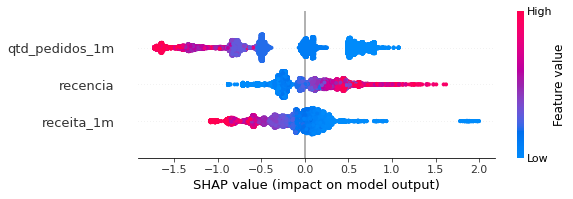

In [ ]:
shap.summary_plot(shap_values[1], X_oot_transformado, plot_type='dot')

**ADICIONE SUAS RESPOSTAS AQUI**

- **Qual a variável mais importante?**
 <br>A variável mais importante é qtd_pedidos_1m


- **Como ela se relaciona com a variável target?**
<br><i>Observação:</i>
<br>A classe 0 em nosso modelo significa que não haverá churn no próximo mês
<br>Enquanto que a classe 1 significa que haverá churn no próximo mês
<br>A concentração de pontos "High" da feature "qtde_pedidos_1m" está concentrada no lado esquerdo, que é a classe 0, ou seja, que há tendência de que não haverá churn
<br><i>Conclusão:</i>
<br>A interpretação é que se o valor desta feature for alto, haverá uma chance alta que não haverá churn no próximo mês

- **Como as outras variáveis se relacionam com a variável target?**
 <br><i>recencia</i>: Quanto mais alto for a recência, maior a possibilidade de não haver churn
 <br><i>receita_1m</i>: Quanto mais alto for esta feature, maior a possibilidade de não haver churn.
